In [36]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
# Load data
age = pd.read_csv('./data/2004_per_age_region.csv', delimiter=';')

age.head(5)

,state,pop18_29_democrat,pop30_44_democrat,pop45_64_democrat,pop65_democrat,pop18_29_republican,pop30_44_republican,pop45_64_republican,pop65_republican,division,region
0,New York,72.0,61,52,53,25.0,39,47,47,Middle Atlantic,Northeast
1,Massachusets,72.0,59,59,61,26.0,40,39,39,New England,Northeast
2,California,58.0,52,60,47,39.0,46,38,50,Pacific,West
3,Connecticut,70.0,56,54,44,29.0,43,45,55,New England,Northeast
4,New Hampshire,57.0,45,51,52,43.0,53,48,47,New England,Northeast


In [52]:
# Drop ages that are out of range of interest
age_range = age.drop(columns=['pop65_democrat', 'pop65_republican', 'division'])

# Normalize percents
age_range['pop18_29_democrat'] = age_range['pop18_29_democrat'] / (age_range['pop18_29_democrat'] + age_range['pop18_29_republican'])
age_range['pop30_44_democrat'] = age_range['pop30_44_democrat'] / (age_range['pop30_44_democrat'] + age_range['pop30_44_republican'])
age_range['pop45_64_democrat'] = age_range['pop45_64_democrat'] / (age_range['pop45_64_democrat'] + age_range['pop45_64_republican'])

age_range['pop18_29_republican'] = 1 - age_range['pop18_29_democrat']
age_range['pop30_44_republican'] = 1 - age_range['pop30_44_democrat']
age_range['pop45_64_republican'] = 1 - age_range['pop45_64_democrat']

# One hot encode categorical columns
age_range_ohe = pd.get_dummies(age_range, columns=['region'])

# Drop states that have NaN and state column
age_range_ohe_drop = age_range_ohe.dropna(axis=0)
age_range_ohe_drop = age_range_ohe_drop.set_index('state', drop=True)


In [59]:
age_range_ohe_drop

,pop18_29_democrat,pop30_44_democrat,pop45_64_democrat,pop18_29_republican,pop30_44_republican,pop45_64_republican,region_Midwest,region_Northeast,region_South,region_West
state,,,,,,,,,,
New York,0.742268,0.610000,0.525253,0.257732,0.390000,0.474747,False,True,False,False
Massachusets,0.734694,0.595960,0.602041,0.265306,0.404040,0.397959,False,True,False,False
California,0.597938,0.530612,0.612245,0.402062,0.469388,0.387755,False,False,False,True
Connecticut,0.707071,0.565657,0.545455,0.292929,0.434343,0.454545,False,True,False,False
New Hampshire,0.570000,0.459184,0.515152,0.430000,0.540816,0.484848,False,True,False,False
Wisconsin,0.581633,0.440000,0.505051,0.418367,0.560000,0.494949,True,False,False,False
Iowa,0.535354,0.444444,0.494949,0.464646,0.555556,0.505051,True,False,False,False
Nevada,0.571429,0.479592,0.464646,0.428571,0.520408,0.535354,False,False,False,True
Pennsylvania,0.606061,0.484848,0.480000,0.393939,0.515152,0.520000,False,True,False,False


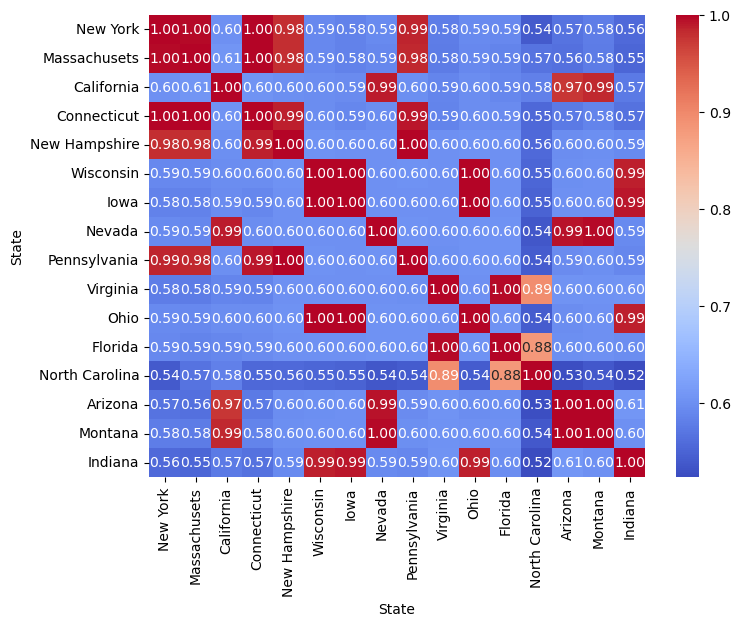

In [54]:
cos_sim = cosine_similarity(age_range_ohe_drop)
similarity_df = pd.DataFrame(cos_sim, index=age_range_ohe_drop.index, columns=age_range_ohe_drop.index)

plt.figure(figsize=(8,6))
sns.heatmap(similarity_df, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.xlabel('State')
plt.ylabel('State')
plt.show()

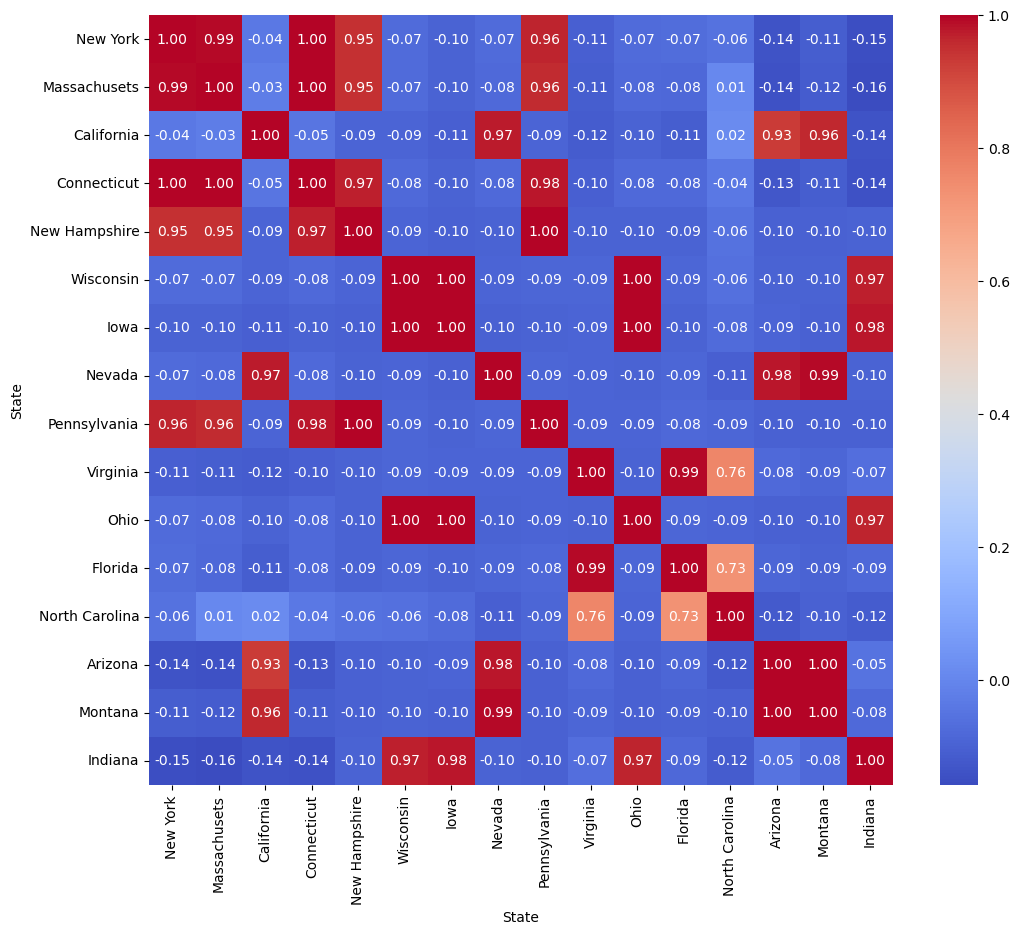

In [58]:
correlation_matrix = age_range_ohe_drop.T.corr()

plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.xlabel('State')
plt.ylabel('State')
plt.show()